# Dataset1: "Adult"

# **I. Processing**
This part of code acquires the data, analyze it, and clean it.

## 1. Load the datasets
We use two different datasets in our code.

The first is the "Adult Income" dataset given in the assignment.

The second is the "Bank Marketing" dataset. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit.



In [66]:
# Import the libraries that are useful
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
import graphviz

## Adult Income

In [67]:
# The names of the columns in "Adult Income"
header_list = ["Age", "Workclass", "Fnlwgt", "Education", "Education_num", "Marital_status", "Occupation", "Relationship", "Race", "Sex", "Capital_gain","Capital_loss","Hours_per_week","Native_country","Income"]

# Read the data from file (The path can be different)
adult_df = pd.read_csv('./drive/MyDrive/COMP551/adult.data', delimiter=",", header = None, names=header_list, index_col=False)

# Show the first 5 instances
print(adult_df.shape)
adult_df.head()


(32561, 15)


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Clean the data & Go beyond
We have observed that only 3 columns in the dataset have missing data: Workclass, Occupation, Native_country.

As suggested in "go beyond", we would like to try data impuation when we face with missing data.



In [68]:
# First, we identify the duplicated instances and drop the rows with duplicate values
# Because only 32,561 instances are collected, we believe that the possibility of have 2 people with 
# the exact same value for all features is very low. So we believe that they are duplicated by mistake.
# So we decide to remove them.

print(len(adult_df[adult_df.duplicated(keep=False)])) #There are 47 duplicated rows
adult_df.drop_duplicates(keep='first', inplace=True)

47


In [69]:
# Let's group by a feature and see which value appears most frequently
print(adult_df.groupby(['Workclass']).size())
print(adult_df.groupby(['Occupation']).size())
print(adult_df.groupby(['Native_country']).size())

Workclass
 ?                    1836
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22673
 Self-emp-inc         1116
 Self-emp-not-inc     2540
 State-gov            1298
 Without-pay            14
dtype: int64
Occupation
 ?                    1843
 Adm-clerical         3768
 Armed-Forces            9
 Craft-repair         4094
 Exec-managerial      4065
 Farming-fishing       992
 Handlers-cleaners    1369
 Machine-op-inspct    2000
 Other-service        3291
 Priv-house-serv       147
 Prof-specialty       4136
 Protective-serv       649
 Sales                3650
 Tech-support          927
 Transport-moving     1597
dtype: int64
Native_country
 ?                               582
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                       

**To deal with missing data, we use a method called "Imputation". We impute the missing values with the most frequent value in the dataset.**


In [70]:
# Replace the question marks in "Native_country" with "United-States", because U.S. is the most fequent country
adult_df["Native_country"].replace({" ?": " United-States"}, inplace=True)

# Replace the question marks in "Workclass" with "Private", because "Private" is the most fequent sector
adult_df["Workclass"].replace({" ?": " Private"}, inplace=True)

# Replace the question marks in "Occupation" with a random choice from "Craft-repair, Sales, Adm-clerical".
# Because in the "Private" sector, they are the top 3 frequent occupations (3191, 2942, 2736)
question_mark_size = len(adult_df[adult_df["Occupation"]==" ?"]);
print(question_mark_size)
adult_df["Occupation"].replace({" ?": np.random.choice([" Craft-repair", " Sales",  " Other-service"], size=question_mark_size)}, inplace=True)


1843


In [71]:
print(adult_df[adult_df['Workclass']==" Private"].groupby(['Occupation']).size())

Occupation
 Adm-clerical         2831
 Craft-repair         3789
 Exec-managerial      2690
 Farming-fishing       453
 Handlers-cleaners    1272
 Machine-op-inspct    1911
 Other-service        3346
 Priv-house-serv       147
 Prof-specialty       2309
 Protective-serv       190
 Sales                3570
 Tech-support          735
 Transport-moving     1266
dtype: int64


## 4. Data Visualization
In this part, we visualize the data we have seen.

In [72]:
# Plot the feature in dataframe X
def plot_features(X):
  for i, col in enumerate(X.columns):
    plt.figure(figsize=(20,4))
    X.groupby(col).size().plot(kind='bar')

# Uncomment this to see the plots!!!
# plot_features(adult_df.drop(['Fnlwgt'], 1))

## 3. One-hot Encoding
In this part, we convert discrete variables into multiple variables using one-hot encoding.


In [73]:
# Use pandas get_dummies function
adult_df = pd.get_dummies(adult_df, prefix_sep='_', drop_first=True)

print(adult_df.shape)
adult_df.head()

(32537, 98)


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **II. Experiments**
In this part, we compare two supervised learning frameworks, namely K-nearest neighbours (KNN) and decision
trees, to predict whether the income of an adult exceeds $50K/yr.

In [54]:
# Select the column "Income_ >50K" as targets
y = adult_df['Income_ >50K'].values

# Drop the column of "Income_ >50K", and use the rest as features X
X = adult_df.drop(['Income_ >50K'], 1).values

print(X)
print(X.shape)

[[    39  77516     13 ...      1      0      0]
 [    50  83311     13 ...      1      0      0]
 [    38 215646      9 ...      1      0      0]
 ...
 [    58 151910      9 ...      1      0      0]
 [    22 201490      9 ...      1      0      0]
 [    52 287927      9 ...      1      0      0]]
(32537, 97)


## 1. Implement and perform 5-fold cross validation
In this part, we implement and perform 5-fold cross validation on the training/validation data to optimize hyperparameters for both models. The implementation here is from scratch.


### **Cross validation function**

In [74]:
def my_cross_val_score(pModel, X_train, y_train, fold):
    accuracy_arr = []
    training_acc = []

    # The array X_train is splitted into "0,1,2,...,n-1" n parts
    X_parts = np.array_split(X_train, fold)
    y_parts = np.array_split(y_train, fold)

    # Iterate through the n parts
    for i in range(fold):
          # Initialize the new training sets
          new_X = np.array([])
          new_y = np.array([])

          # For each part, we merge the rest n-1 parts as our new training set
          for j in range(fold):
                if i!=j:
                    if new_X.size==0:
                      new_X = X_parts[j]
                      new_y = y_parts[j]
                    else:
                      new_X = np.concatenate((new_X, X_parts[j]), axis = 0)
                      new_y = np.concatenate((new_y, y_parts[j]), axis = 0)

          # Now, we fit our data to the model passed by the user
          pModel.fit(new_X, new_y)

          # Compute the validation accuracy on the validation set (the i-th part), and store it
          accuracy_arr.append(pModel.score(X_parts[i], y_parts[i]))
          
          # Compute the training accuracy on the training set, and store it
          training_acc.append(pModel.score(new_X, new_y))

    # Return a tuple that contains both the training accuray list and the validation accuracy list
    return np.array(accuracy_arr), np.array(training_acc)

### **Use KNN**

In [60]:
from sklearn import neighbors
X_train = X
y_train = y

# Do cross validation for N=1 to N=20
best_acc = 0
best_cfg = 0
acc_list = []
std_list = []
train_acc_list = []
train_std_list = []
N_list = np.arange(1,26)
for n_neighbors in N_list:
  #Initialize the KNN model
  knn_model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', algorithm='kd_tree')

  # Use my own implementation for cross validation
  scores = my_cross_val_score(knn_model, X_train, y_train, fold=5)

  print(f'number of neighbors {n_neighbors}' +"| Accuracy="+ f'{scores[0].mean():.4f} ± {scores[0].std():.4f} over {scores[0].shape[0]} trials')

  # Store the mean and standard deviation 
  acc = scores[0].mean()
  acc_list.append(acc)
  std_list.append(scores[0].std())

  train_acc_list.append(scores[1].mean())
  train_std_list.append(scores[1].std())


  # Keep track of the best accuracy and its configuation
  if acc > best_acc:
    best_cfg = n_neighbors
    best_acc = acc

print(f'best cross validation accuracy : {best_acc:.3f} found with config {best_cfg}')

number of neighbors 1| Accuracy=0.7347 ± 0.0032 over 5 trials
number of neighbors 2| Accuracy=0.7880 ± 0.0029 over 5 trials
number of neighbors 3| Accuracy=0.7604 ± 0.0027 over 5 trials
number of neighbors 4| Accuracy=0.7896 ± 0.0032 over 5 trials
number of neighbors 5| Accuracy=0.7765 ± 0.0031 over 5 trials
number of neighbors 6| Accuracy=0.7922 ± 0.0027 over 5 trials
number of neighbors 7| Accuracy=0.7839 ± 0.0031 over 5 trials
number of neighbors 8| Accuracy=0.7940 ± 0.0032 over 5 trials
number of neighbors 9| Accuracy=0.7894 ± 0.0032 over 5 trials
number of neighbors 10| Accuracy=0.7953 ± 0.0034 over 5 trials
number of neighbors 11| Accuracy=0.7937 ± 0.0040 over 5 trials
number of neighbors 12| Accuracy=0.7968 ± 0.0027 over 5 trials
number of neighbors 13| Accuracy=0.7956 ± 0.0024 over 5 trials
number of neighbors 14| Accuracy=0.7973 ± 0.0032 over 5 trials
number of neighbors 15| Accuracy=0.7969 ± 0.0038 over 5 trials
number of neighbors 16| Accuracy=0.7981 ± 0.0025 over 5 trials
n

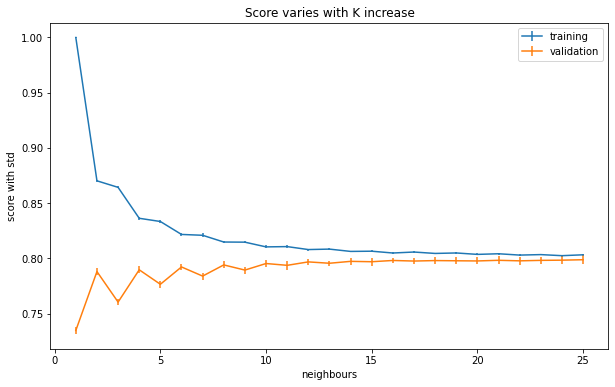

In [61]:
plt.figure(figsize=(10,6))

plt.errorbar(N_list, train_acc_list, train_std_list)
plt.errorbar(N_list, acc_list, std_list)
ax = plt.gca()

plt.xlabel("neighbours")
plt.ylabel("score with std")
plt.title("Score varies with K increase")
plt.legend(["training", "validation"])
plt.savefig("train&val_knn_k.png", format="png")
plt.show()

### **Use Decision Tree**

In [ ]:
# Draw a decision tree to see what really happens
from sklearn import tree
import graphviz
X_train = X
y_train = y

tree_model = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.001)
tree_model.fit(X_train, y_train)

print(tree_model.score(X, y))

feature_name = adult_df.drop(['Income_ >50K'], 1).columns
class_name = ["<50K",">50K"]
dot_data = tree.export_graphviz(tree_model, feature_names = feature_name, class_names=class_name)

graph = graphviz.Source(dot_data)
graph


In [56]:
# Import the model and initialize it
from sklearn.tree import DecisionTreeClassifier
X_train = X
y_train = y

# Specify a list of impurity decrease we want to test
best_acc = 0
best_cfg = 0
impurity_list = [0.000005,0.00001, 0.00005, 0.0001,0.0003,0.0005,0.0008,0.001,0.005,0.01,0.05,0.1,0.5,1]
acc_list = []
std_list = []
train_acc_list = []
train_std_list = []

# For each impurity, we train a model, do 5-fold cross validation
for impurity in impurity_list:
  tree_model = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=impurity)

  # Cross validation
  scores = my_cross_val_score(tree_model, X_train, y_train, fold=5)

  print(f'min_impurity_decrease: {impurity}' +"| Accuracy="+ f'{scores[0].mean():.4f} ± {scores[0].std():.4f} over {scores[0].shape[0]} trials')

  # Store the mean and standard deviation 
  acc = scores[0].mean()
  acc_list.append(acc)
  std_list.append(scores[0].std())

  # Store the mean and std for training accuracy
  train_acc_list.append(scores[1].mean())
  train_std_list.append(scores[1].std())


  # Keep track of the best accuracy and its configuation
  if acc > best_acc:
    best_cfg = impurity
    best_acc = acc

print(f'best cross validation accuracy : {best_acc:.3f} found with min_impurity_decrease = {best_cfg}')

min_impurity_decrease: 5e-06| Accuracy=0.8168 ± 0.0027 over 5 trials
min_impurity_decrease: 1e-05| Accuracy=0.8181 ± 0.0034 over 5 trials
min_impurity_decrease: 5e-05| Accuracy=0.8206 ± 0.0023 over 5 trials
min_impurity_decrease: 0.0001| Accuracy=0.8441 ± 0.0044 over 5 trials
min_impurity_decrease: 0.0003| Accuracy=0.8581 ± 0.0043 over 5 trials
min_impurity_decrease: 0.0005| Accuracy=0.8570 ± 0.0031 over 5 trials
min_impurity_decrease: 0.0008| Accuracy=0.8542 ± 0.0037 over 5 trials
min_impurity_decrease: 0.001| Accuracy=0.8536 ± 0.0029 over 5 trials
min_impurity_decrease: 0.005| Accuracy=0.8437 ± 0.0037 over 5 trials
min_impurity_decrease: 0.01| Accuracy=0.8437 ± 0.0037 over 5 trials
min_impurity_decrease: 0.05| Accuracy=0.7591 ± 0.0031 over 5 trials
min_impurity_decrease: 0.1| Accuracy=0.7591 ± 0.0031 over 5 trials
min_impurity_decrease: 0.5| Accuracy=0.7591 ± 0.0031 over 5 trials
min_impurity_decrease: 1| Accuracy=0.7591 ± 0.0031 over 5 trials
best cross validation accuracy : 0.858 f

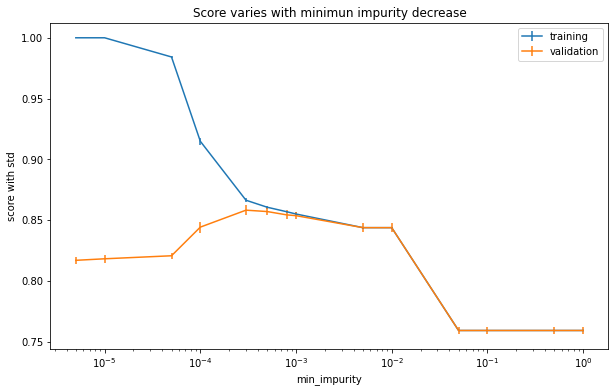

In [59]:
# Plot the score
plt.figure(figsize=(10,6))

plt.errorbar(impurity_list, train_acc_list, train_std_list)
plt.errorbar(impurity_list, acc_list, std_list)
ax = plt.gca()
ax.set_xscale('log')

plt.xlabel("min_impurity")
plt.ylabel("score with std")
plt.title("Score varies with minimun impurity decrease")
plt.legend(["training", "validation"])

plt.savefig("train&val_tree_impurity.png", format="png")
plt.show()

## 2. Sample growing subsets
Sample growing subsets of the training/validation data and repeat step 1. We want to understand how the size
of a dataset impacts both the training and validation error.

### **Use KNN**

In [64]:
from sklearn import neighbors
# Do cross validation for N=1 to N=20
best_acc = 0
best_cfg = 0
acc_list = []
std_list = []
train_acc_list = []
train_std_list = []
percent_list = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

knn_model = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='kd_tree')

# For each percentage, we train a model, do 5-fold cross validation
for percent in percent_list:
  # Use the percentage of data
  X_train = X[0: int(len(X)*percent)]
  y_train = y[0: int(len(y)*percent)]

  # Cross validation
  scores = my_cross_val_score(knn_model, X_train, y_train, fold=5)

  print(f'Percentage of data used: {percent}' +"| Accuracy="+ f'{scores[0].mean():.4f} ± {scores[0].std():.4f} over {scores[0].shape[0]} trials')

  # Store the mean and standard deviation 
  acc = scores[0].mean()
  acc_list.append(acc)
  std_list.append(scores[0].std())

  # Store the mean and std for training accuracy
  train_acc_list.append(scores[1].mean())
  train_std_list.append(scores[1].std())

  # Keep track of the best accuracy and its configuation
  if acc > best_acc:
    best_cfg = percent
    best_acc = acc

print(f'best cross validation accuracy : {best_acc:.3f} found with percentage = {best_cfg}')

Percentage of data used: 1| Accuracy=0.7988 ± 0.0039 over 5 trials
Percentage of data used: 0.9| Accuracy=0.7974 ± 0.0035 over 5 trials
Percentage of data used: 0.8| Accuracy=0.7989 ± 0.0043 over 5 trials
Percentage of data used: 0.7| Accuracy=0.7979 ± 0.0024 over 5 trials
Percentage of data used: 0.6| Accuracy=0.7975 ± 0.0046 over 5 trials
Percentage of data used: 0.5| Accuracy=0.7962 ± 0.0052 over 5 trials
Percentage of data used: 0.4| Accuracy=0.7951 ± 0.0067 over 5 trials
Percentage of data used: 0.3| Accuracy=0.7939 ± 0.0085 over 5 trials
Percentage of data used: 0.2| Accuracy=0.7839 ± 0.0079 over 5 trials
Percentage of data used: 0.1| Accuracy=0.7688 ± 0.0092 over 5 trials
best cross validation accuracy : 0.799 found with percentage = 0.8


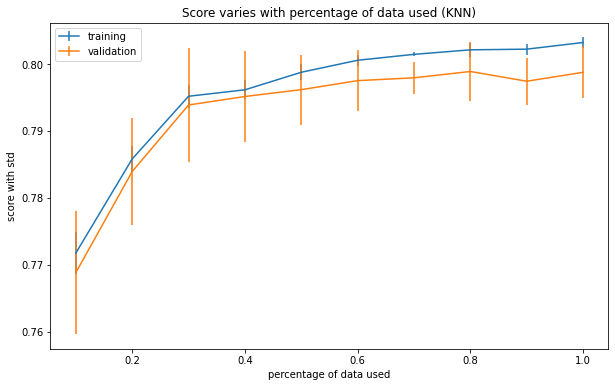

In [65]:
plt.figure(figsize=(10,6))

plt.errorbar(percent_list, train_acc_list, train_std_list)
plt.errorbar(percent_list, acc_list, std_list)
ax = plt.gca()

plt.xlabel("percentage of data used")
plt.ylabel("score with std")
plt.title("Score varies with percentage of data used (KNN)")
plt.legend(["training", "validation"])
plt.savefig("train&val_knn_percentage.png", format="png")
plt.show()

### **Use Decision Tree**

In [62]:
# Import the model and initialize it
from sklearn.tree import DecisionTreeClassifier

# Specify a list of percentage of data we want to work on
best_acc = 0
best_cfg = 0
percent_list = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
acc_list = []
std_list = []
train_acc_list = []
train_std_list = []
tree_model = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.0005)

# For each percentage, we train a model, do 5-fold cross validation
for percent in percent_list:

  # Use the percentage of data
  X_train = X[0: int(len(X)*percent)]
  y_train = y[0: int(len(y)*percent)]

  # Cross validation
  scores = my_cross_val_score(tree_model, X_train, y_train, fold=5)

  print(f'Percentage of data used: {percent}' +"| Accuracy="+ f'{scores[0].mean():.4f} ± {scores[0].std():.4f} over {scores[0].shape[0]} trials')

  # Store the mean and standard deviation 
  acc = scores[0].mean()
  acc_list.append(acc)
  std_list.append(scores[0].std())

  # Store the mean and std for training accuracy
  train_acc_list.append(scores[1].mean())
  train_std_list.append(scores[1].std())

  # Keep track of the best accuracy and its configuation
  if acc > best_acc:
    best_cfg = percent
    best_acc = acc

print(f'best cross validation accuracy : {best_acc:.3f} found with percentage = {best_cfg}')

Percentage of data used: 1| Accuracy=0.8570 ± 0.0031 over 5 trials
Percentage of data used: 0.9| Accuracy=0.8580 ± 0.0040 over 5 trials
Percentage of data used: 0.8| Accuracy=0.8555 ± 0.0036 over 5 trials
Percentage of data used: 0.7| Accuracy=0.8532 ± 0.0032 over 5 trials
Percentage of data used: 0.6| Accuracy=0.8545 ± 0.0053 over 5 trials
Percentage of data used: 0.5| Accuracy=0.8525 ± 0.0050 over 5 trials
Percentage of data used: 0.4| Accuracy=0.8483 ± 0.0079 over 5 trials
Percentage of data used: 0.3| Accuracy=0.8412 ± 0.0089 over 5 trials
Percentage of data used: 0.2| Accuracy=0.8300 ± 0.0043 over 5 trials
Percentage of data used: 0.1| Accuracy=0.7953 ± 0.0171 over 5 trials
best cross validation accuracy : 0.858 found with percentage = 0.9


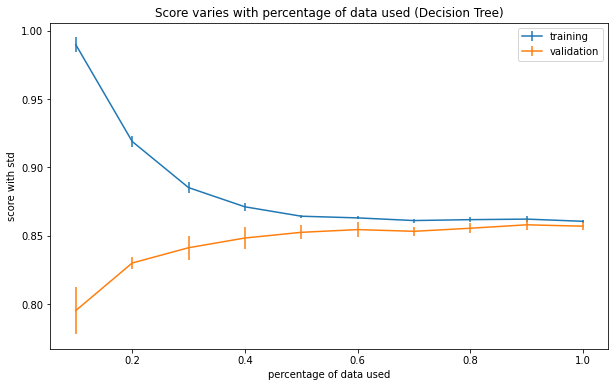

In [63]:
# Plot the score
plt.figure(figsize=(10,6))

plt.errorbar(percent_list, train_acc_list, train_std_list)
plt.errorbar(percent_list, acc_list, std_list)
ax = plt.gca()

plt.xlabel("percentage of data used")
plt.ylabel("score with std")
plt.title("Score varies with percentage of data used (Decision Tree)")
plt.legend(["training", "validation"])
plt.savefig("train&val_tree_percentage.png", format="png")
plt.show()

## 3. Test the best performing model
Take the best performing model and apply it on
the test set. This is an unbiased estimate of how your model
would perform on new/unseen data.

### **Load test dataset**

In [76]:
# We first load the test dataset
# The names of the columns
header_list = ["Age", "Workclass", "Fnlwgt", "Education", "Education_num", "Marital_status", "Occupation", "Relationship", "Race", "Sex", "Capital_gain","Capital_loss","Hours_per_week","Native_country","Income"]

# Read the data from file (The path can be different)
adult_test_df = pd.read_csv('./drive/MyDrive/COMP551/adult.test', delimiter=",", header = None, names=header_list, index_col=False)

# Show the first 5 instances
print(adult_test_df.shape)
adult_test_df.dropna()

# Replace the question marks in "Native_country" with "United-States", because U.S. is the most fequent country
adult_test_df["Native_country"].replace({" ?": " United-States"}, inplace=True)

# Replace the question marks in "Workclass" with "Private", because "Private" is the most fequent sector
adult_test_df["Workclass"].replace({" ?": " Private"}, inplace=True)

# Replace the question marks in "Occupation" with a random choice from "Craft-repair, Sales, Adm-clerical".
# Because in the "Private" sector, they are the top 3 frequent occupations (3191, 2942, 2736)
question_mark_size = len(adult_test_df[adult_test_df["Occupation"]==" ?"]);
print(question_mark_size)
adult_test_df["Occupation"].replace({" ?": np.random.choice([" Craft-repair", " Sales",  " Other-service"], size=question_mark_size)}, inplace=True)

# Use pandas get_dummies function
adult_test_df = pd.get_dummies(adult_test_df, prefix_sep='_', drop_first=True)

# Get missing columns in the training test
missing_cols = set( adult_df.columns ) - set( adult_test_df.columns )
print(missing_cols)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    adult_test_df[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
adult_test_df = adult_test_df[adult_df.columns]

# Select the column "Income_ >50K" as targets
y_test = adult_test_df['Income_ >50K'].values

# Drop the column of "Income_ >50K", and use the rest as features X
X_test = adult_test_df.drop(['Income_ >50K'], 1).values

print(y_test)

(16281, 15)
966
{'Native_country_ Holand-Netherlands', 'Income_ >50K'}
[0 0 0 ... 0 0 0]


### **Use best KNN**

In [79]:
from sklearn import neighbors
X_train=X
y_train=y

# Fit training data into knn model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='kd_tree')
knn_model.fit(X_train, y_train)

# Report prediction accuracy on the test set
score = knn_model.score(X_test, y_test)

# Print result
print(f'Test accuracy : {score} found with config K=10')

Test accuracy : 0.9401756648854493 found with config K=10


### **Use best Decision Tree**

In [80]:
# Import the model and initialize it
from sklearn.tree import DecisionTreeClassifier
X_train=X
y_train=y

# Fit training data into decision tree model
tree_model = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.0005)
tree_model.fit(X_train, y_train)

# Report prediction accuracy on the test set
score = tree_model.score(X_test, y_test)

# Print the result
print(f'Test accuracy : {score} found with config min_impurity_decrease= 0.0005')

Test accuracy : 0.8366193722744303 found with config min_impurity_decrease= 0.0005


## 4. Go above and beyond
We have investigated on the ways of handling of missing data (data imputation). See "Processing" part for our progress.

## 5. Analyze your findings
Q: How did the choice of the various hyper-parameters impact generalization? 

A: The choics of hyper-parameters affects how well the model generalizes. If K in KNN is too low, the model tends to overfit. If the min_impurity_decrease in Decision Trees too low, the model also overfits.

Q: How about the size of training data?

A: Generally the more training data is provided, the better the validation accuracy.


# Dataset2: "Bank"

# **I. Processing**
This part of code acquires the data, analyze it, and clean it.

## 1. Load the datasets
We use two different datasets in our code.

The first is the "Adult Income" dataset given in the assignment.

The second is the "Bank Marketing" dataset. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit.



## Bank Marketing

In [81]:
from sklearn.model_selection import train_test_split

# the entry represents (How many people have the same list of features)
header_list = ["Age", "Job", "Marital", "Education", "Default", "Balance", "Housing", "Loan", "Contact", 
               "Day", "Month", "Duration", "Campaign", "Pdays", "Previous", "Poutcounts", "y"]

# Read the data from file
dfb = pd.read_csv('./drive/MyDrive/COMP551/bank-full.csv', delimiter=";", header = None, names=header_list, index_col=False, low_memory=False)
print(dfb.shape)

# Drop the first row and reset the index since the first row shows the headers
dfb.drop(index=dfb.index[0], axis=0, inplace=True)
dfb = dfb.reset_index(drop=True)

# Split a set of test data since the test data is not given
np.random.seed(111)
dfb, dfb_test = train_test_split(dfb, test_size=0.15, shuffle=True)

print(dfb.shape)
print(dfb_test.shape)

# Show all colunms in a row
pd.set_option('max_columns', None)
dfb.head()


(45212, 17)
(38429, 17)
(6782, 17)


,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcounts,y
38274,37,blue-collar,single,primary,no,851,yes,no,cellular,15,may,151,1,352,1,failure,no
43425,57,retired,married,unknown,no,230,no,no,cellular,6,apr,177,2,210,3,failure,yes
5504,34,technician,married,unknown,no,4053,yes,no,unknown,23,may,123,2,-1,0,unknown,no
1726,29,admin.,married,secondary,no,0,yes,no,unknown,9,may,121,1,-1,0,unknown,no
35244,35,blue-collar,single,primary,no,1147,yes,yes,telephone,7,may,29,1,-1,0,unknown,no


## 2. Clean the data & Go beyond
We have observed that none of the column in the dataset have missing data

Apart from this, we found that feature "Contact" 



**We delet the feature "Contact" and check for "?" value if there is any,delete it**


In [82]:
# Drop the column of "Contact"
def cleaning(dfb):  
    dfb = dfb.drop('Contact', 1)
    dfb = dfb.drop('Day', 1)
    dfb = dfb.replace("None", np.NAN)
    dfb = dfb.dropna()
    return dfb

dfb = cleaning(dfb)
# The ways to print the rows with one particular column have some value, here it is " ?"
# question = dfb.loc[dfb['Occupation'] == ' ?']
# print(question)

## 3. One-hot Encoding
In this part, we convert discrete variables into multiple variables using one-hot encoding.


In [83]:
# For example in binary case, we really don't need 2 feature, but only one: subscribed or not? 1 yes , 0 no 
# So we set drop_first=True
# We did one-hot encoding for training set
dfb = pd.get_dummies(dfb, prefix_sep='_', drop_first=True, columns=["Job", "Marital", "Education", "Default", "Housing", "Loan", 
               "Month", "Poutcounts", "y"])

print(dfb.shape)
dfb.head()

(38429, 40)


,Age,Balance,Duration,Campaign,Pdays,Previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Education_secondary,Education_tertiary,Education_unknown,Default_yes,Housing_yes,Loan_yes,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,Poutcounts_other,Poutcounts_success,Poutcounts_unknown,y_yes
38274,37,851,151,1,352,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
43425,57,230,177,2,210,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5504,34,4053,123,2,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1726,29,0,121,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
35244,35,1147,29,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [84]:
# This part is for one-hot encoding for test set
dfb_test = pd.get_dummies(dfb_test, prefix_sep='_', drop_first=True, columns=["Job", "Marital", "Education", "Default", "Housing", "Loan", 
               "Month", "Poutcounts", "y"])

print(dfb_test.shape)
dfb_test.head()

(6782, 42)


,Age,Balance,Contact,Day,Duration,Campaign,Pdays,Previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Education_secondary,Education_tertiary,Education_unknown,Default_yes,Housing_yes,Loan_yes,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,Poutcounts_other,Poutcounts_success,Poutcounts_unknown,y_yes
1657,26,100,unknown,9,24,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
18914,58,0,cellular,4,506,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
31794,28,11555,cellular,8,125,2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2138,29,891,unknown,12,820,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
29529,32,320,cellular,3,22,4,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


# **II. Experiments**

In [85]:
# Split the last column out and store in yb

yb = dfb['y_yes'].values
print(yb)

[0 1 0 ... 0 0 0]


In [86]:
# Drop the column of "y_yes", and use the rest as features Xb
Xb = dfb.drop('y_yes', 1).values
print(Xb.shape)
print(type(Xb))
print(Xb)

(38429, 39)
<class 'numpy.ndarray'>
[['37' '851' '151' ... 0 0 0]
 ['57' '230' '177' ... 0 0 0]
 ['34' '4053' '123' ... 0 0 1]
 ...
 ['39' '528' '111' ... 0 0 1]
 ['32' '1160' '450' ... 0 0 1]
 ['38' '1315' '23' ... 0 0 1]]


## 1. Implement and perform 5-fold cross validation

### **Use KNN**

In [ ]:
from sklearn import neighbors
Xb_train = Xb
yb_train = yb

# Do cross validation for N=1 to N=20
best_acc = 0
best_cfg = 0
acc_list = []
std_list = []
N_list = np.arange(1,31)
for n_neighbors in N_list:
  #Initialize the KNN model
  knn_model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', algorithm='kd_tree', leaf_size=30)

  # c=0: validation accuracy, c=1: training accuracy
  c=0
  # Use my own implementation for cross validation
  scores = my_cross_val_score(knn_model, Xb_train, yb_train, fold=5)
  print(f'number of neighbors {n_neighbors}' +"| Accuracy="+ f'{scores[c].mean():.4f} ± {scores[c].std():.4f} over {scores[c].shape[0]} trials')

  # Store the mean and standard deviation 
  acc = scores[c].mean()
  acc_list.append(acc)
  std_list.append(scores[c].std())

  # Keep track of the best accuracy and its configuation
  if acc > best_acc:
    best_cfg = n_neighbors
    best_acc = acc

print(f'best cross validation accuracy : {best_acc:.3f} found with config {best_cfg}')

number of neighbors 1| Accuracy=0.8477 ± 0.0041 over 5 trials
number of neighbors 2| Accuracy=0.8804 ± 0.0029 over 5 trials


### **Use Decision Tree**

0.9006219261495225


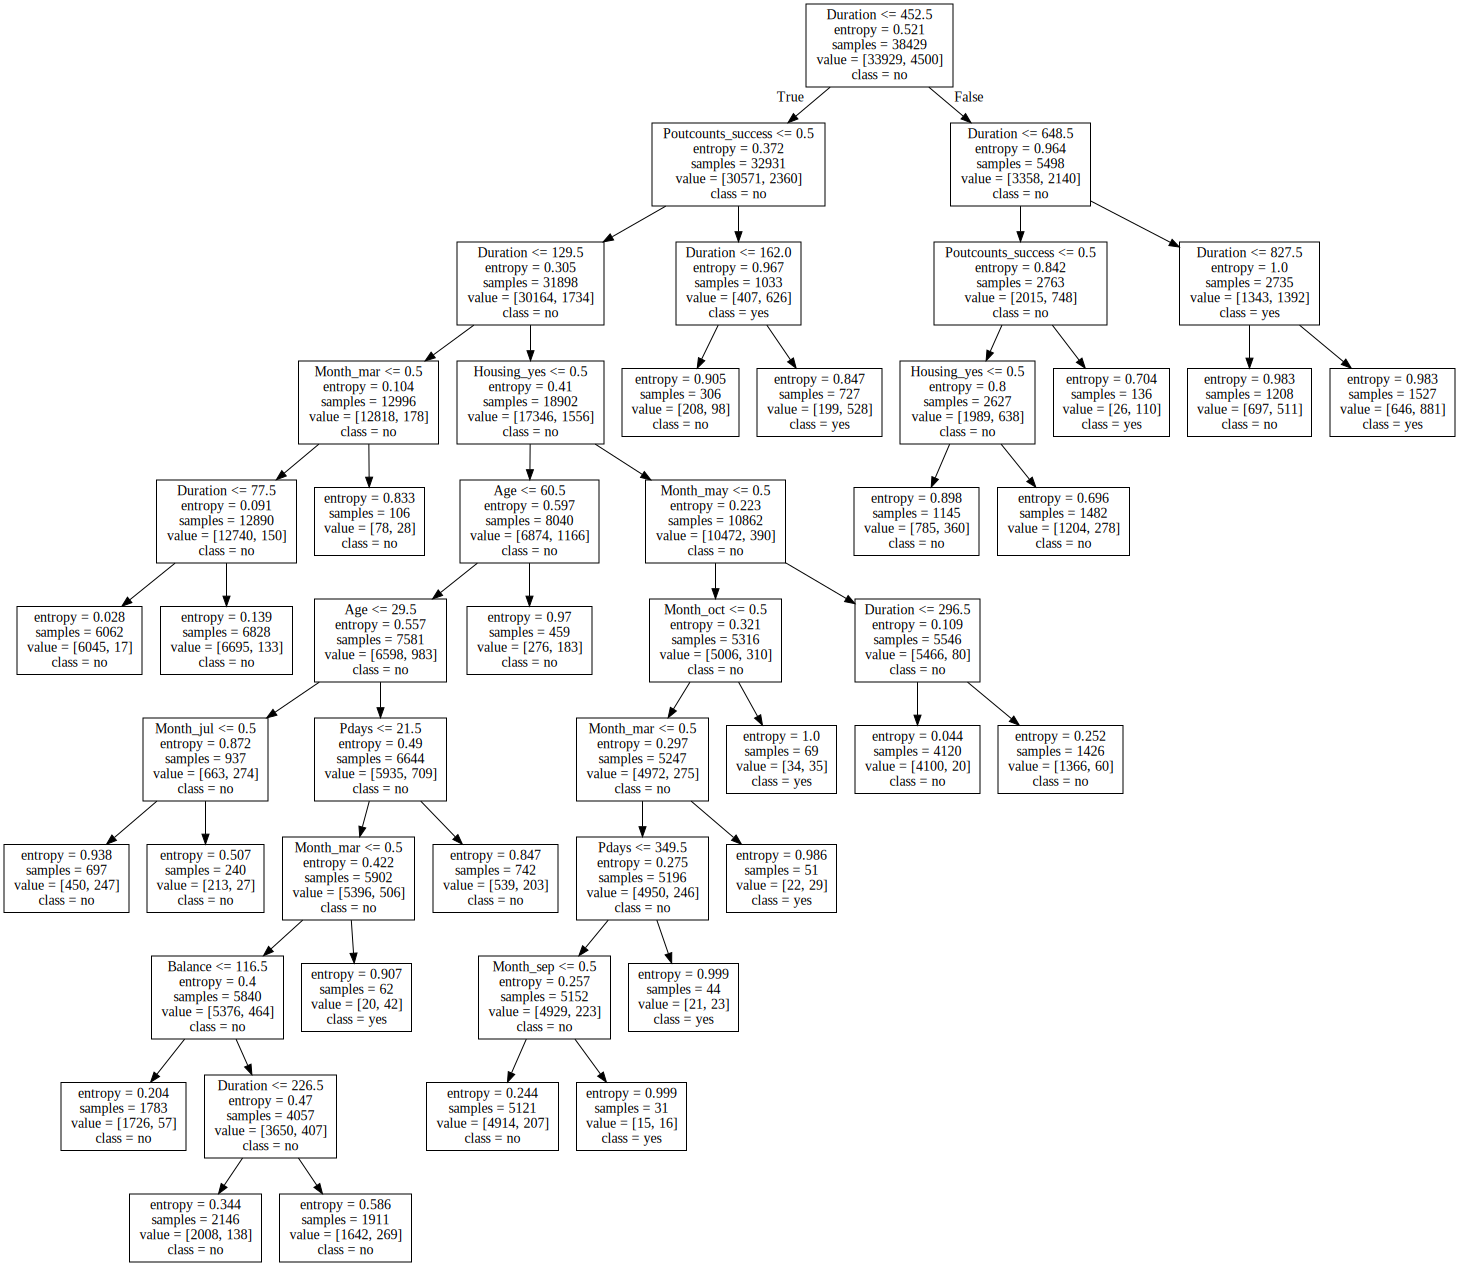

In [87]:
# Draw a decision tree to see what really happens
from sklearn import tree
import graphviz
Xb_train = Xb
yb_train = yb

tree_model = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.001)
tree_model.fit(Xb_train, yb_train)

print(tree_model.score(Xb, yb))

feature_name = dfb.drop('y_yes', 1).columns
class_name = ["no","yes"]
dot_data = tree.export_graphviz(tree_model, feature_names = feature_name, class_names=class_name)

graph = graphviz.Source(dot_data)
graph


In [88]:
# Import the model and initialize it
from sklearn.tree import DecisionTreeClassifier
Xb_train = Xb
yb_train = yb

# Specify a list of impurity decrease we want to test
best_acc = 0
best_cfg = 0
impurity_list = [0.000005,0.00001, 0.00005, 0.0001,0.0003,0.0005,0.0008,0.001,0.005,0.01,0.05,0.1,0.5,1]
acc_list = []
std_list = []

# For each impurity, we train a model, do 5-fold cross validation
for impurity in impurity_list:
  tree_model = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=impurity)

  # Cross validation
  scores = my_cross_val_score(tree_model, Xb_train, yb_train, fold=5)
  # c=0: validation accuracy, c=1: training accuracy
  c=0
  print(f'min_impurity_decrease: {impurity}' +"| Accuracy="+ f'{scores[c].mean():.4f} ± {scores[c].std():.4f} over {scores[c].shape[0]} trials')

  # Store the mean and standard deviation 
  acc = scores[c].mean()
  acc_list.append(acc)
  std_list.append(scores[c].std())

  # Keep track of the best accuracy and its configuation
  if acc > best_acc:
    best_cfg = impurity
    best_acc = acc

print(f'best cross validation accuracy : {best_acc:.3f} found with min_impurity_decrease = {best_cfg}')

min_impurity_decrease: 5e-06| Accuracy=0.8683 ± 0.0018 over 5 trials
min_impurity_decrease: 1e-05| Accuracy=0.8693 ± 0.0015 over 5 trials
min_impurity_decrease: 5e-05| Accuracy=0.8702 ± 0.0015 over 5 trials
min_impurity_decrease: 0.0001| Accuracy=0.8870 ± 0.0028 over 5 trials
min_impurity_decrease: 0.0003| Accuracy=0.8989 ± 0.0034 over 5 trials
min_impurity_decrease: 0.0005| Accuracy=0.8988 ± 0.0035 over 5 trials
min_impurity_decrease: 0.0008| Accuracy=0.8996 ± 0.0033 over 5 trials
min_impurity_decrease: 0.001| Accuracy=0.8997 ± 0.0033 over 5 trials
min_impurity_decrease: 0.005| Accuracy=0.8899 ± 0.0036 over 5 trials
min_impurity_decrease: 0.01| Accuracy=0.8888 ± 0.0022 over 5 trials
min_impurity_decrease: 0.05| Accuracy=0.8829 ± 0.0029 over 5 trials
min_impurity_decrease: 0.1| Accuracy=0.8829 ± 0.0029 over 5 trials
min_impurity_decrease: 0.5| Accuracy=0.8829 ± 0.0029 over 5 trials
min_impurity_decrease: 1| Accuracy=0.8829 ± 0.0029 over 5 trials
best cross validation accuracy : 0.900 f

## 2. Sample growing subsets

### **Use KNN**

In [ ]:
plt.figure(figsize=(10,6))

plt.errorbar(percent_list, acc_list, std_list)
ax = plt.gca()

plt.xlabel("percentage of data used")
plt.ylabel("score with std")
plt.title("Score varies with percentage of data used (KNN)")
plt.legend(["score"])
plt.savefig("knn_percentage.png", format="png")
plt.show()

### **Use Decision Tree**

In [90]:
# Import the model and initialize it
from sklearn.tree import DecisionTreeClassifier

# Specify a list of percentage of data we want to work on
best_acc = 0
best_cfg = 0
percent_list = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
acc_list = []
std_list = []
tree_model = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.0005)

# For each percentage, we train a model, do 5-fold cross validation
for percent in percent_list:

  # Use the percentage of data
  Xb_train = Xb[0: int(len(X)*percent)]
  yb_train = yb[0: int(len(y)*percent)]

  # Cross validation
  scores = my_cross_val_score(tree_model, Xb_train, yb_train, fold=5)
  # c=0: validation accuracy, c=1: training accuracy
  c=0

  print(f'Percentage of data used: {percent}' +"| Accuracy="+ f'{scores[c].mean():.4f} ± {scores[c].std():.4f} over {scores[c].shape[0]} trials')

  # Store the mean and standard deviation 
  acc = scores[c].mean()
  acc_list.append(acc)
  std_list.append(scores[c].std())

  # Keep track of the best accuracy and its configuation
  if acc > best_acc:
    best_cfg = percent
    best_acc = acc

print(f'best cross validation accuracy : {best_acc:.3f} found with percentage = {best_cfg}')

Percentage of data used: 1| Accuracy=0.8999 ± 0.0025 over 5 trials
Percentage of data used: 0.9| Accuracy=0.8999 ± 0.0026 over 5 trials
Percentage of data used: 0.8| Accuracy=0.9012 ± 0.0030 over 5 trials
Percentage of data used: 0.7| Accuracy=0.9000 ± 0.0031 over 5 trials
Percentage of data used: 0.6| Accuracy=0.8984 ± 0.0055 over 5 trials
Percentage of data used: 0.5| Accuracy=0.8979 ± 0.0042 over 5 trials
Percentage of data used: 0.4| Accuracy=0.8960 ± 0.0056 over 5 trials
Percentage of data used: 0.3| Accuracy=0.8913 ± 0.0083 over 5 trials
Percentage of data used: 0.2| Accuracy=0.8781 ± 0.0085 over 5 trials
Percentage of data used: 0.1| Accuracy=0.8607 ± 0.0046 over 5 trials
best cross validation accuracy : 0.901 found with percentage = 0.8


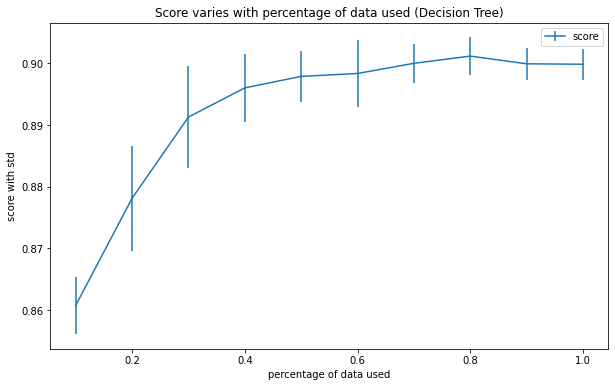

In [91]:
# Plot the score
plt.figure(figsize=(10,6))

plt.errorbar(percent_list, acc_list, std_list)
ax = plt.gca()

plt.xlabel("percentage of data used")
plt.ylabel("score with std")
plt.title("Score varies with percentage of data used (Decision Tree)")
plt.legend(["score"])
plt.savefig("tree_percentage.png", format="png")
plt.show()

## 3. Test the best performing model

 ### Load and Clean the Test Data

In [92]:
# Load the test set
print(dfb_test.shape)

# Clean the data
dfb_test = cleaning(dfb_test)
print(dfb_test.shape)

print(dfb_test.shape)
dfb_test.head()

(6782, 42)
(6782, 40)
(6782, 40)


,Age,Balance,Duration,Campaign,Pdays,Previous,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Education_secondary,Education_tertiary,Education_unknown,Default_yes,Housing_yes,Loan_yes,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,Poutcounts_other,Poutcounts_success,Poutcounts_unknown,y_yes
1657,26,100,24,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
18914,58,0,506,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
31794,28,11555,125,2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2138,29,891,820,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
29529,32,320,22,4,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [93]:
# Set features & targets
yb_test = dfb_test['y_yes'].values
Xb_test = dfb_test.drop('y_yes', 1).values
print(Xb_test.shape)

(6782, 39)


### Use best KNN

In [94]:
from sklearn import neighbors
Xb_train=Xb
yb_train=yb

# Fit training data into knn model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=21, weights='uniform', algorithm='kd_tree')
knn_model.fit(Xb_train, yb_train)

# Report prediction accuracy on the test set
score = knn_model.score(Xb_test, yb_test)

# Print result
print(f'Test accuracy : {score} found with config K=21')

Test accuracy : 0.8879386611618991 found with config K=21


### Use best Decision Tree

In [95]:
# Import the model and initialize it
from sklearn.tree import DecisionTreeClassifier
Xb_train=Xb
yb_train=yb

# Fit training data into decision tree model
tree_model = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.001)
tree_model.fit(Xb_train, yb_train)

# Report prediction accuracy on the test set
score = tree_model.score(Xb_test, yb_test)

# Print the result
print(f'Test accuracy : {score} found with config min_impurity_decrease= 0.001')

Test accuracy : 0.9041580654674137 found with config min_impurity_decrease= 0.001
